In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import math
import matplotlib.pyplot as plt
# import GPy
from utils import plot_heatmap

data = xr.open_dataset("data/delhi_cpcb_2022.nc")
# data = xr.open_dataset("delhi_cpcb_2022.nc")
# data = pd.read_csv("../data/final_data.csv.gz")
data

<xarray.Dataset>
Dimensions:    (station: 40, time: 8783)
Coordinates:
  * station    (station) object 'Alipur, Delhi - DPCC' ... 'Wazirpur, Delhi -...
  * time       (time) datetime64[ns] 2022-01-01T00:30:00 ... 2023-01-01T22:23:30
    latitude   (station) float64 ...
    longitude  (station) float64 ...
Data variables: (12/21)
    From Date  (station, time) datetime64[ns] ...
    To Date    (station, time) datetime64[ns] ...
    PM2.5      (station, time) float64 ...
    PM10       (station, time) float64 ...
    NO         (station, time) float64 ...
    NO2        (station, time) float64 ...
    ...         ...
    WD         (station, time) float64 ...
    SR         (station, time) float64 ...
    BP         (station, time) float64 ...
    AT         (station, time) float64 ...
    RF         (station, time) float64 ...
    TOT-RF     (station, time) float64 ...

In [5]:
df_ = data.to_dataframe().reset_index()
df_

,station,time,From Date,To Date,PM2.5,PM10,NO,NO2,NOx,NH3,...,RH,WS,WD,SR,BP,AT,RF,TOT-RF,latitude,longitude
0,"Alipur, Delhi - DPCC",2022-01-01 00:30:00,2022-01-01 00:00:00,2022-01-01 01:00:00,219.50,342.75,94.73,53.95,105.95,3.78,...,79.75,NaN,205.95,4.60,999.10,6.85,0.0,0.0,28.815329,77.153010
1,"Alipur, Delhi - DPCC",2022-01-01 01:30:00,2022-01-01 01:00:00,2022-01-01 02:00:00,224.50,360.25,89.30,44.70,96.60,5.50,...,82.23,NaN,206.05,4.60,998.90,6.72,0.0,0.0,28.815329,77.153010
2,"Alipur, Delhi - DPCC",2022-01-01 02:30:00,2022-01-01 02:00:00,2022-01-01 03:00:00,217.00,359.00,50.08,48.20,66.45,4.30,...,82.30,NaN,205.38,4.62,998.70,6.97,0.0,0.0,28.815329,77.153010
3,"Alipur, Delhi - DPCC",2022-01-01 03:30:00,2022-01-01 03:00:00,2022-01-01 04:00:00,214.25,341.50,25.18,42.80,43.30,3.70,...,82.28,NaN,206.50,4.62,998.42,6.72,0.0,0.0,28.815329,77.153010
4,"Alipur, Delhi - DPCC",2022-01-01 04:30:00,2022-01-01 04:00:00,2022-01-01 05:00:00,207.50,309.67,24.17,44.75,43.50,3.38,...,82.30,NaN,211.95,4.65,998.15,6.60,0.0,0.0,28.815329,77.153010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351315,"Wazirpur, Delhi - DPCC",2023-01-01 18:30:00,2023-01-01 18:00:00,2023-01-01 19:00:00,102.00,177.00,44.28,45.48,89.87,54.17,...,68.28,2.30,322.33,5.80,997.03,18.15,0.0,0.0,28.699793,77.165453
351316,"Wazirpur, Delhi - DPCC",2023-01-01 19:30:00,2023-01-01 19:00:00,2023-01-01 20:00:00,154.25,294.50,89.90,48.85,139.18,63.35,...,74.60,7.68,281.27,5.80,997.42,17.38,0.0,0.0,28.699793,77.165453
351317,"Wazirpur, Delhi - DPCC",2023-01-01 20:30:00,2023-01-01 20:00:00,2023-01-01 21:00:00,264.75,431.75,156.93,49.38,207.53,63.30,...,79.50,7.30,268.28,5.83,997.83,16.78,0.0,0.0,28.699793,77.165453
351318,"Wazirpur, Delhi - DPCC",2023-01-01 21:30:00,2023-01-01 21:00:00,2023-01-01 22:00:00,360.75,556.00,125.40,46.78,171.90,74.70,...,83.00,6.92,268.52,5.80,998.08,16.27,0.0,0.0,28.699793,77.165453


/var/folders/jk/w0z8m7r15qz2bq604dfvr16h0000gn/T/ipykernel_31839/226427145.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['time'])
/var/folders/jk/w0z8m7r15qz2bq604dfvr16h0000gn/T/ipykernel_31839/226427145.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['time'])
/var/folders/jk/w0z8m7r15qz2bq604dfvr16h0000gn/T/ipykernel_31839/226427145.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

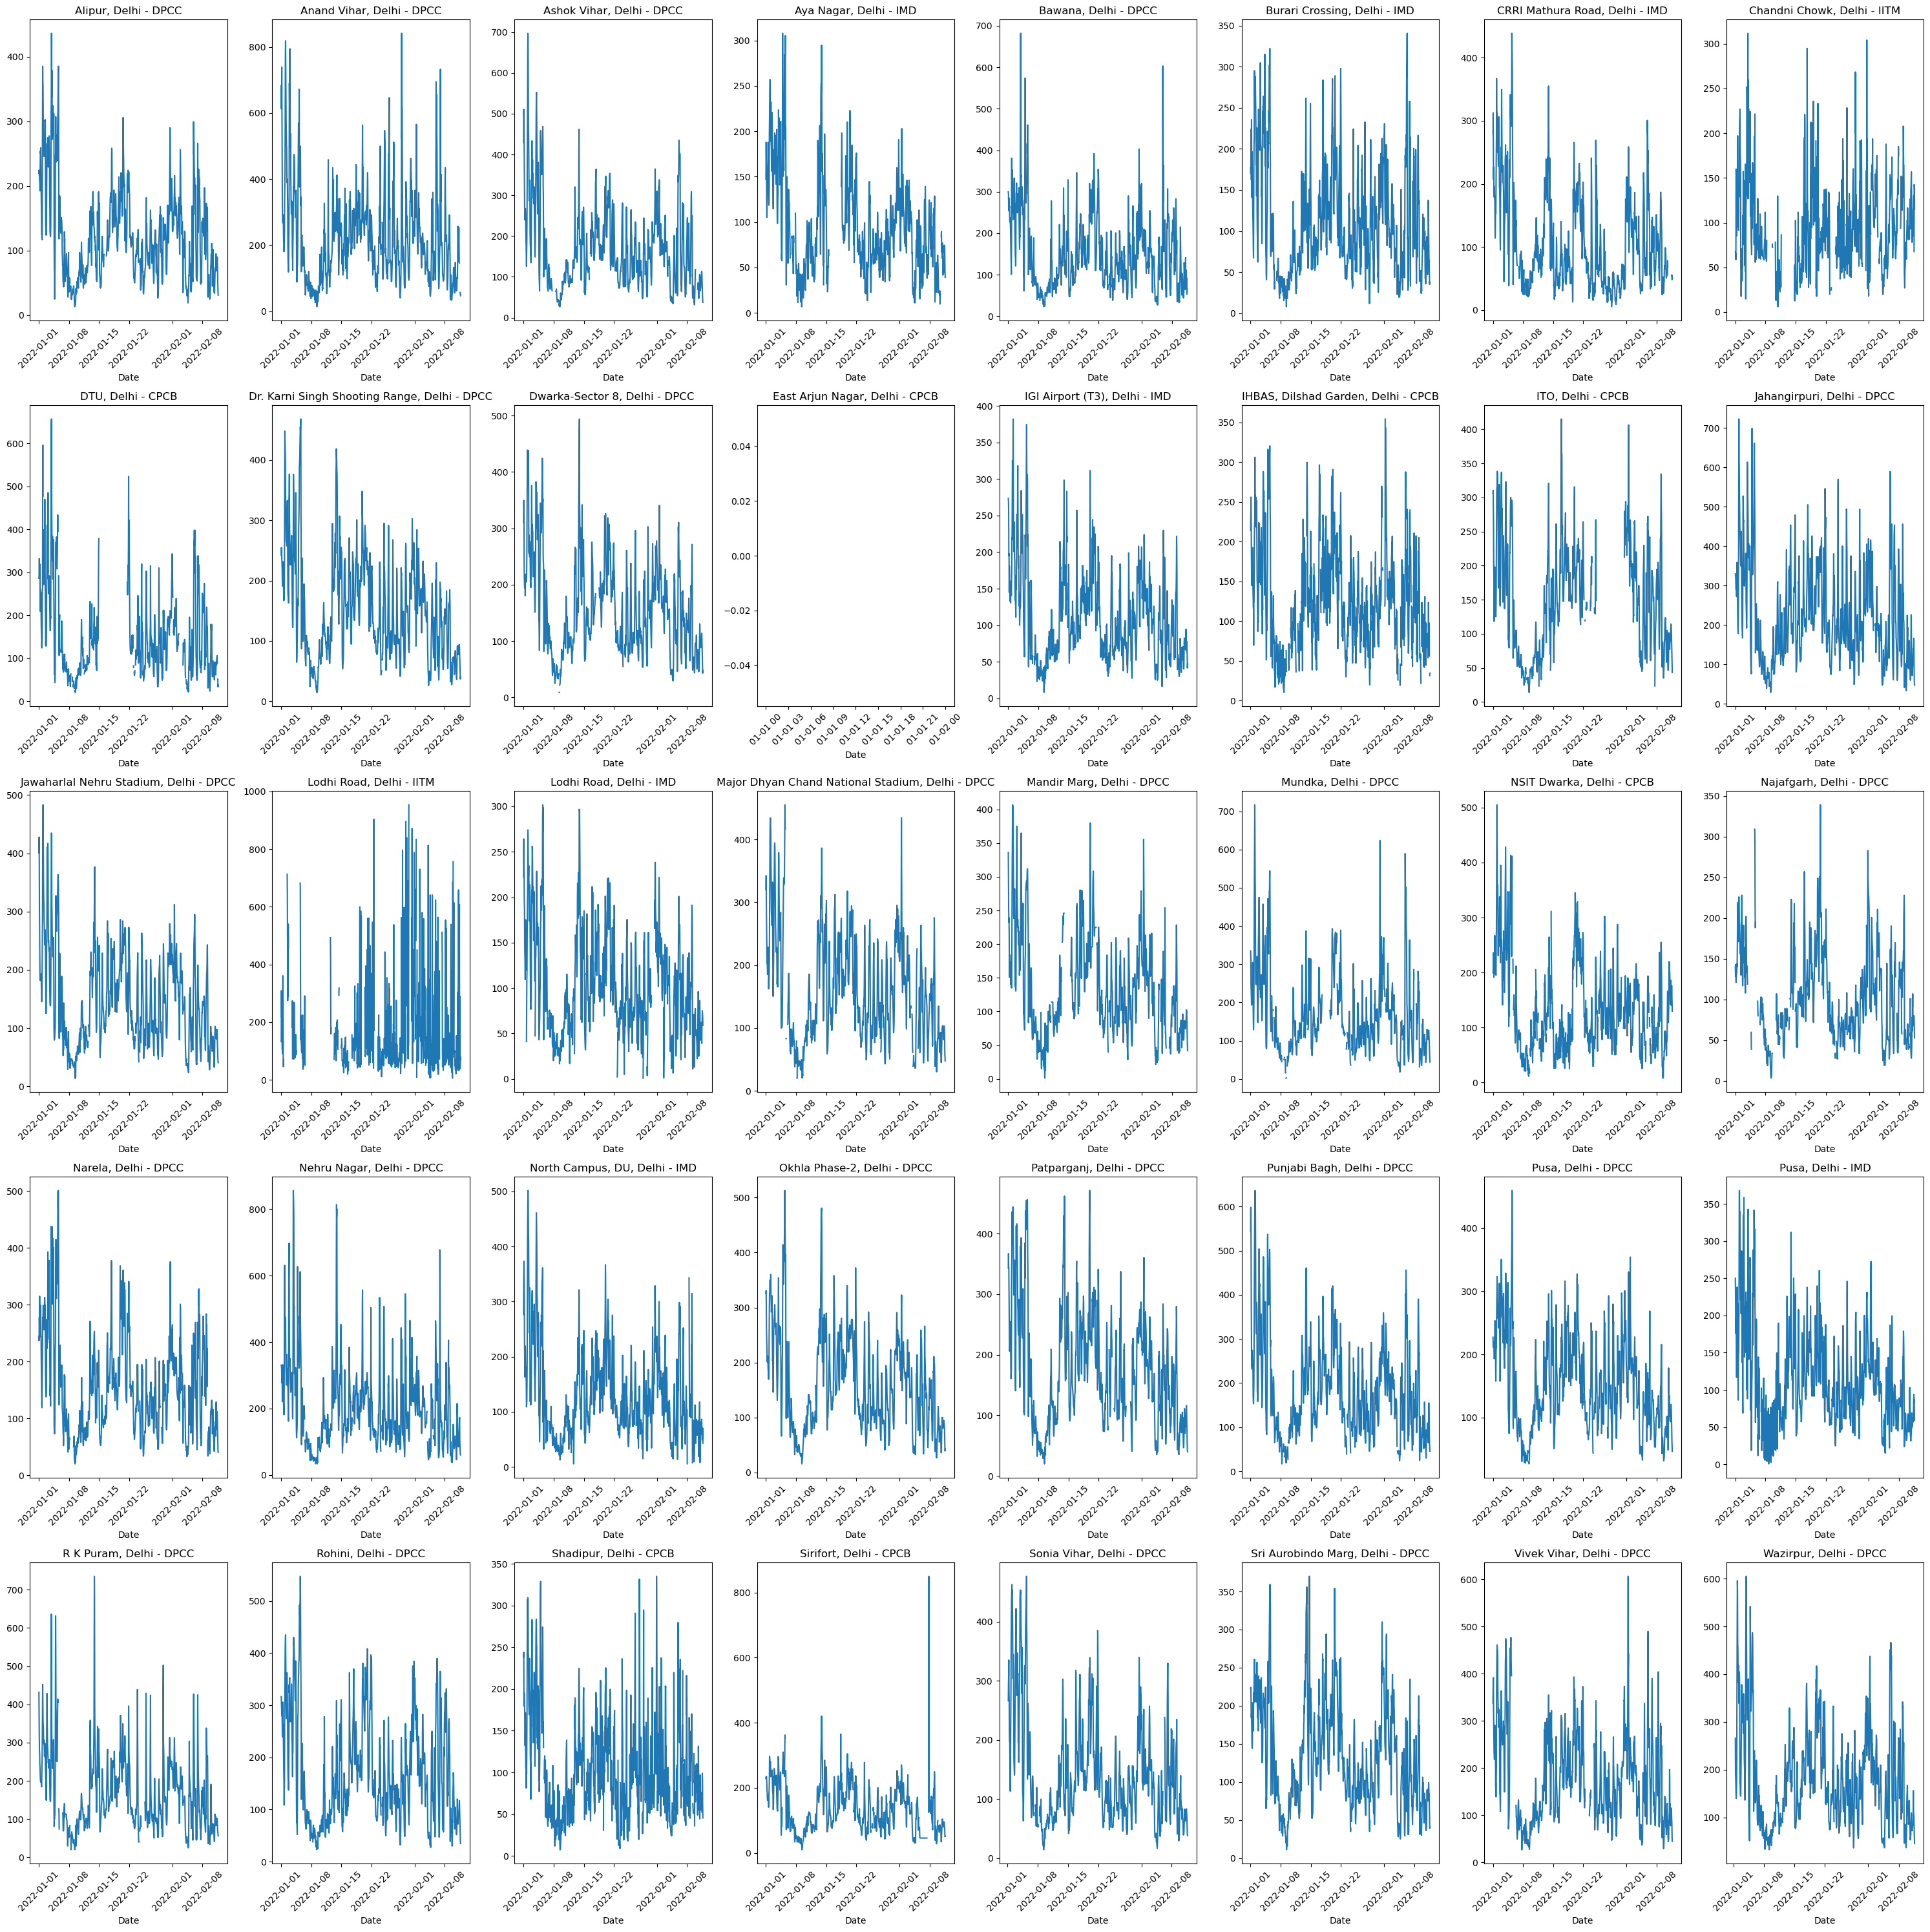

In [14]:
import matplotlib.pyplot as plt

# Create a figure and subplots with a 5x8 grid
fig, axes = plt.subplots(nrows=5, ncols=8, figsize=(30, 30))

# Iterate over unique stations and plot the PM2.5 values with dates
for i, station in enumerate(df_.station.unique()):
    row = i // 8  # Row index
    col = i % 8   # Column index
    
    # Select data for the current station
    df = df_[df_["station"]==station]
    df['Date'] = pd.to_datetime(df['time'])
    df = df.set_index('Date')

    # Plot the PM2.5 values on the corresponding subplot
    axes[row, col].plot(df.index[:1000], df["PM2.5"][:1000])
    axes[row, col].set_xlabel('Date')
    axes[row, col].set_title(station)  # Set the subplot title
    
    # Rotate and align the x-axis tick labels diagonally
    axes[row, col].tick_params(axis='x', rotation=45)

# Adjust the spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()
